**Maud GELLEE**

**Wiem CHOUCHANE**

**M2 APP LS1**

**Big Data & Machine Learning**

&nbsp;

# Humpback whale identification competition

[Competition link](https://www.kaggle.com/c/humpback-whale-identification/overview)

## Install required libraries

In [1]:
# Update kaggle to be able to fully and correctly download the 5GB dataset
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 4.5 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=84b48c0ac6665115abefe0cf58aac32afe1a0cc027305778577fcf35c2ba9e0e
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [2]:
!pip install scikeras

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.2
    Uninstalling importlib-metadata-4.11.2:
      Successfully uninstalled importlib-metadata-4.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


## Download competition data

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
!mkdir data
!mkdir /root/.kaggle
!cp drive/MyDrive/deep_learning/kaggle.json /root/.kaggle/kaggle.json
!sudo chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c humpback-whale-identification -p data

100% 5.50G/5.51G [00:34<00:00, 202MB/s]
100% 5.51G/5.51G [00:34<00:00, 173MB/s]


In [6]:
!unzip data/humpback-whale-identification.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: train/cd2c4ae6b.jpg     
  inflating: train/cd310f07c.jpg     
  inflating: train/cd32697ae.jpg     
  inflating: train/cd346388a.jpg     
  inflating: train/cd36f1901.jpg     
  inflating: train/cd382b662.jpg     
  inflating: train/cd3937f27.jpg     
  inflating: train/cd3a073a2.jpg     
  inflating: train/cd3afe416.jpg     
  inflating: train/cd407fae0.jpg     
  inflating: train/cd437a15c.jpg     
  inflating: train/cd444321e.jpg     
  inflating: train/cd4740ee9.jpg     
  inflating: train/cd49e7801.jpg     
  inflating: train/cd4b8f33f.jpg     
  inflating: train/cd4fae084.jpg     
  inflating: train/cd520d861.jpg     
  inflating: train/cd52c565c.jpg     
  inflating: train/cd5577b32.jpg     
  inflating: train/cd5712905.jpg     
  inflating: train/cd598b557.jpg     
  inflating: train/cd59d5874.jpg     
  inflating: train/cd5a9c5b1.jpg     
  inflating: train/cd5b23ddc.jpg     
  inflatin

In [7]:
!rm -rf data/humpback-whale-identification.zip

In [8]:
!rm -rf data

## Study data

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [10]:
NUMBER_SAMPLE = 10000

In [11]:
complete_train = pd.read_csv('train.csv')

sample_train = complete_train.head(NUMBER_SAMPLE)

In [12]:
# Reading the csv file for train dataset
train = sample_train

In [13]:
# The info() method prints information about the DataFrame.
# The information contains the number of columns, column labels, column data types,
# memory usage, range index, and the number of cells in each column (non-null values).
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   10000 non-null  object
 1   Id      10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [14]:
# The describe() method is used for calculating some statistical data like percentile,
# mean and std of the numerical values of the Series or DataFrame.
# It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.
train.describe()

,Image,Id
count,10000,10000
unique,10000,3083
top,0000e88ab.jpg,new_whale
freq,1,3847


In [15]:
# shape gives number of rows and columns in a tuple
train.shape

(10000, 2)

In [16]:
# head funtion gives the first 5 rows of datasets
train.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [17]:
# tail funtion gives the last 5 rows of datasets
train.tail()

,Image,Id
9995,6538ef17f.jpg,w_8a1b71c
9996,653b3b0e3.jpg,w_56cb095
9997,6545ebf73.jpg,w_62c78f3
9998,65461842c.jpg,w_89f0c48
9999,65486b0cf.jpg,w_4690940


## Pre-process data

In [18]:
# put labels into y_train variable
y_train = train['Id']
# Drop the 'Id' column
X_train = train.drop(labels = ['Id'], axis = 1)
y_train.head()

0    w_f48451c
1    w_c3d896a
2    w_20df2c5
3    new_whale
4    new_whale
Name: Id, dtype: object

In [19]:
# Look for empty values
train.isnull().sum()

Image    0
Id       0
dtype: int64

In [20]:
# importing the libraries for image preprocessing
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

In [21]:
def prepare_images(data, line_count, path):
    
    X_images = np.zeros((line_count, 100, 100, 3))
    count = 0
    
    for fig in data['Image']:
        
        #load images into images of size 100x100x3
        img = image.load_img(path+'/'+fig, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)

        X_images[count] = x
        if (count%500 == 0):
            print('Processing image: ', count+1, ", ", fig)
        count += 1
    
    return X_images

In [22]:
X_train = prepare_images(X_train, X_train.shape[0], 'train')

Processing image:  1 ,  0000e88ab.jpg
Processing image:  501 ,  04c72257b.jpg
Processing image:  1001 ,  09cacb84d.jpg
Processing image:  1501 ,  0ef961892.jpg
Processing image:  2001 ,  141b56a1a.jpg
Processing image:  2501 ,  199a417aa.jpg
Processing image:  3001 ,  1ec170983.jpg
Processing image:  3501 ,  23f084b93.jpg
Processing image:  4001 ,  29163ad0b.jpg
Processing image:  4501 ,  2e0fab120.jpg
Processing image:  5001 ,  3347515d9.jpg
Processing image:  5501 ,  3842d71dc.jpg
Processing image:  6001 ,  3d7f4c7d5.jpg
Processing image:  6501 ,  425f763ca.jpg
Processing image:  7001 ,  4714400cd.jpg
Processing image:  7501 ,  4c082fbdf.jpg
Processing image:  8001 ,  50c683e23.jpg
Processing image:  8501 ,  560d986ad.jpg
Processing image:  9001 ,  5b68c83ed.jpg
Processing image:  9501 ,  60410f111.jpg


In [23]:
X_train = X_train / 255.0 
# rescaling the dataset 
# dividing an image by 255 simply rescales the image from 0-255 to 0-1.
# (Converting it to float from int makes computation convenient too) 
print('X_train shape: ', X_train.shape)

X_train shape:  (10000, 100, 100, 3)


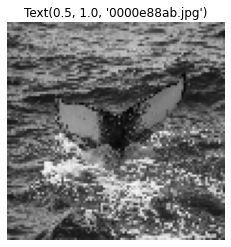

In [24]:
# Checking example input image
plt.imshow(X_train[0][:,:,0], cmap='gray')
plt.title(plt.title(train.iloc[0,0]))
plt.axis('off')
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [26]:
#Fit label encoder and return encoded labels.
y_train = label_encoder.fit_transform(y_train)

In [27]:
# let's look at first 10 values
y_train[0:10]

array([2944, 2362,  413,    0,    0,    0, 2653,    0, 1174, 2005])

In [28]:
# finding shape of y_train data
y_train.shape

(10000,)

In [29]:
y_train_class_count = len(set(y_train))
y_train_class_count

3083

In [30]:
y_train.shape

(10000,)

## Modeling with the Keras Sequential API

In [31]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential # to create a cnn model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [32]:
def get_vanilla_model():
  model = Sequential()

  model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu', input_shape = (100,100,3)))
  model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
  model.add(MaxPool2D(pool_size = (2,2)))
  model.add(BatchNormalization())

  model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
  model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
  model.add(MaxPool2D(pool_size = (2,2), strides=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
  model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
  model.add(MaxPool2D(pool_size = (2,2), strides=(2,2)))
  model.add(BatchNormalization())

  # fully connected
  model.add(Flatten())
  model.add(Dense(256, activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dense(y_train_class_count, activation = 'softmax'))
  return model

In [33]:
def get_dropout_model():

  model = Sequential()

  model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu', input_shape = (100,100,3)))
  model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
  model.add(MaxPool2D(pool_size = (2,2)))
  model.add(BatchNormalization())

  model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
  model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
  model.add(MaxPool2D(pool_size = (2,2), strides=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
  model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
  model.add(MaxPool2D(pool_size = (2,2), strides=(2,2)))
  model.add(BatchNormalization())

  # fully connected
  model.add(Flatten())
  model.add(Dense(256, activation = 'relu'))
  model.add(Dropout(rate=0.3))
  model.add(BatchNormalization())
  model.add(Dropout(rate=0.3))
  model.add(Dense(y_train_class_count, activation = 'softmax'))
  return model

In [34]:
def get_optimizer():
  return Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

In [35]:
# Set a learning rate scheduler
def get_lr_reduction_callback(monitored_loss):
  """
  monitored_loss can either be loss or val_loss.
  """
  return ReduceLROnPlateau(monitor=monitored_loss, 
                           patience=1, 
                           verbose=1, 
                           factor=0.8, 
                           min_lr=0.00001)

## 1) Vanilla model

We first try overfitting the base model on our data subsample

In [ ]:
vanilla_model = get_vanilla_model()

In [ ]:
#Provides the summary of model we created
vanilla_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 32)        9

In [ ]:
vanilla_model.compile(optimizer = get_optimizer(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
vanilla_model_history = vanilla_model.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[get_lr_reduction_callback('loss')])

Epoch 1/10
219/219 [==============================] - 22s 51ms/step - loss: 6.9175 - accuracy: 0.2923 - val_loss: 6.4768 - val_accuracy: 0.3693 - lr: 0.0010
Epoch 2/10
219/219 [==============================] - 10s 45ms/step - loss: 5.2426 - accuracy: 0.3823 - val_loss: 7.0827 - val_accuracy: 0.3777 - lr: 0.0010
Epoch 3/10
219/219 [==============================] - 10s 45ms/step - loss: 4.7260 - accuracy: 0.3823 - val_loss: 6.3779 - val_accuracy: 0.3737 - lr: 0.0010
Epoch 4/10
219/219 [==============================] - 10s 45ms/step - loss: 4.2530 - accuracy: 0.3811 - val_loss: 6.7392 - val_accuracy: 0.3730 - lr: 0.0010
Epoch 5/10
219/219 [==============================] - 10s 45ms/step - loss: 3.7100 - accuracy: 0.3861 - val_loss: 6.9854 - val_accuracy: 0.3517 - lr: 0.0010
Epoch 6/10
219/219 [==============================] - 10s 46ms/step - loss: 3.1478 - accuracy: 0.4070 - val_loss: 7.6704 - val_accuracy: 0.2277 - lr: 0.0010
Epoch 7/10
219/219 [==============================] - 10s 

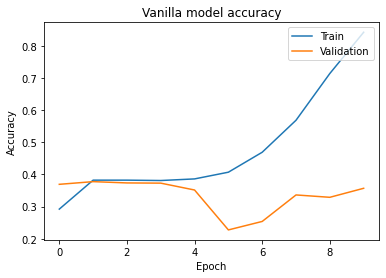

In [ ]:
plt.plot(vanilla_model_history.history['accuracy'])
plt.plot(vanilla_model_history.history['val_accuracy'])
plt.title('Vanilla model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

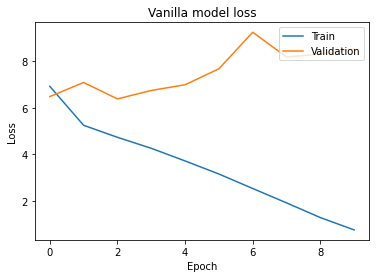

In [ ]:
plt.plot(vanilla_model_history.history['loss'])
plt.plot(vanilla_model_history.history['val_loss'])
plt.title('Vanilla model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Now we want to reduce overfitting

## 2) Base model + dropout

In [ ]:
base_dropout_model = get_dropout_model()

In [ ]:
#Provides the summary of model we created
base_dropout_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 16)      2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 50, 50, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 conv2d_9 (Conv2D)           (None, 50, 50, 32)       

In [ ]:
base_dropout_model.compile(optimizer = get_optimizer(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
base_dropout_model_history = base_dropout_model.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[get_lr_reduction_callback('val_loss')])

Epoch 1/10
219/219 [==============================] - 12s 49ms/step - loss: 7.0171 - accuracy: 0.2611 - val_loss: 6.8956 - val_accuracy: 0.2677 - lr: 0.0010
Epoch 2/10
219/219 [==============================] - 10s 46ms/step - loss: 5.6209 - accuracy: 0.3739 - val_loss: 6.1518 - val_accuracy: 0.3780 - lr: 0.0010
Epoch 3/10
219/219 [==============================] - ETA: 0s - loss: 5.4233 - accuracy: 0.3773
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.000800000037997961.
219/219 [==============================] - 10s 46ms/step - loss: 5.4233 - accuracy: 0.3773 - val_loss: 6.3126 - val_accuracy: 0.3693 - lr: 0.0010
Epoch 4/10
219/219 [==============================] - ETA: 0s - loss: 5.0961 - accuracy: 0.3776
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0006400000303983689.
219/219 [==============================] - 10s 48ms/step - loss: 5.0961 - accuracy: 0.3776 - val_loss: 6.5142 - val_accuracy: 0.3773 - lr: 8.0000e-04
Epoch 5/10
218/219 [===========================

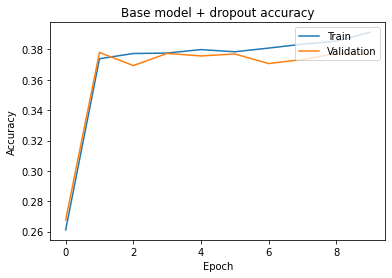

In [ ]:
plt.plot(base_dropout_model_history.history['accuracy'])
plt.plot(base_dropout_model_history.history['val_accuracy'])
plt.title('Base model + dropout accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

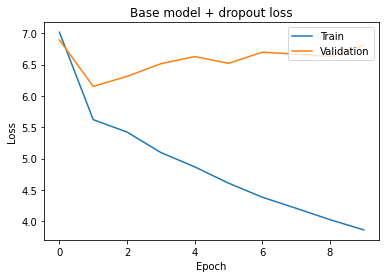

In [ ]:
plt.plot(base_dropout_model_history.history['loss'])
plt.plot(base_dropout_model_history.history['val_loss'])
plt.title('Base model + dropout loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## 3) Base model + Dropout + data generation

In [ ]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images horizontally
        vertical_flip=False, # randomly flip images vertically
        validation_split=0.3)  


datagen.fit(X_train)

In [ ]:
batch_size = 64

train_generator = datagen.flow_from_dataframe(
    dataframe=train,
    directory='train',
    x_col='Image',
    y_col='Id',
    target_size=(100, 100),
    batch_size=batch_size,
    subset='training',
    class_mode='sparse') # set as training data

validation_generator = datagen.flow_from_dataframe(
    dataframe=train,
    directory='train',
    x_col='Image',
    y_col='Id',
    target_size=(100, 100),
    batch_size=batch_size,
    subset='validation',
    class_mode='sparse') # set as validation data

Found 7000 validated image filenames belonging to 3083 classes.
Found 3000 validated image filenames belonging to 3083 classes.


In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
print(STEP_SIZE_TRAIN)
print(STEP_SIZE_VALID)

109
46


In [ ]:
dropout_datagen_model = get_dropout_model()

In [ ]:
#Provides the summary of model we created
dropout_datagen_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 100, 100, 16)      448       
                                                                 
 conv2d_19 (Conv2D)          (None, 100, 100, 16)      2320      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 50, 50, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_20 (Conv2D)          (None, 50, 50, 32)        4640      
                                                                 
 conv2d_21 (Conv2D)          (None, 50, 50, 32)       

In [ ]:
dropout_datagen_model.compile(optimizer = get_optimizer(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
dropout_datagen_model_history = dropout_datagen_model.fit_generator(train_generator, 
                                                                    epochs=10, verbose = 2, 
                                                                    steps_per_epoch=STEP_SIZE_TRAIN, 
                                                                    validation_steps=STEP_SIZE_VALID, 
                                                                    callbacks=[get_lr_reduction_callback('val_loss')], 
                                                                    validation_data=validation_generator)

Epoch 1/10
109/109 - 130s - loss: 7.3917 - accuracy: 0.2213 - val_loss: 11.5877 - val_accuracy: 0.3947 - lr: 0.0010 - 130s/epoch - 1s/step
Epoch 2/10
109/109 - 123s - loss: 6.0900 - accuracy: 0.3437 - val_loss: 6.1795 - val_accuracy: 0.3899 - lr: 0.0010 - 123s/epoch - 1s/step
Epoch 3/10

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.000800000037997961.
109/109 - 113s - loss: 5.4909 - accuracy: 0.3724 - val_loss: 6.7996 - val_accuracy: 0.3855 - lr: 0.0010 - 113s/epoch - 1s/step
Epoch 4/10

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0006400000303983689.
109/109 - 112s - loss: 5.3420 - accuracy: 0.3754 - val_loss: 6.3231 - val_accuracy: 0.3628 - lr: 8.0000e-04 - 112s/epoch - 1s/step
Epoch 5/10

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005120000336319208.
109/109 - 110s - loss: 5.2412 - accuracy: 0.3775 - val_loss: 6.5390 - val_accuracy: 0.3927 - lr: 6.4000e-04 - 110s/epoch - 1s/step
Epoch 6/10

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0004

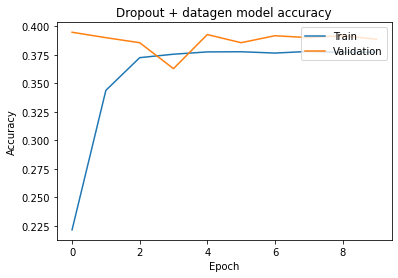

In [ ]:
plt.plot(dropout_datagen_model_history.history['accuracy'])
plt.plot(dropout_datagen_model_history.history['val_accuracy'])
plt.title('Dropout + datagen model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

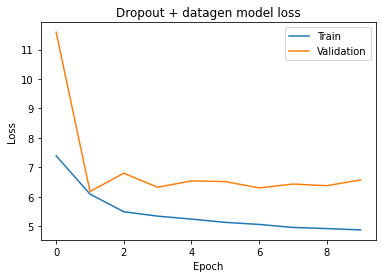

In [ ]:
plt.plot(dropout_datagen_model_history.history['loss'])
plt.plot(dropout_datagen_model_history.history['val_loss'])
plt.title('Dropout + datagen model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## 4) Vanilla transfer learning + dropout

In [ ]:
from tensorflow.keras.applications import ResNet50V2

In [ ]:
pretrained_model = ResNet50V2(include_top=False, input_shape=[100, 100, 3], pooling='avg')  # we previously reshaped images to 100 x 100 squares

for layer in pretrained_model.layers:
  layer.trainable = False

94683136/94668760 [==============================] - 2s 0us/step


In [ ]:
def get_transfer_learning_model(pretrained_model):
  model = Sequential()
  model.add(pretrained_model)
  model.add(BatchNormalization())
  # fully connected
  model.add(Flatten())
  model.add(Dense(256, activation = 'relu'))
  model.add(Dropout(rate=0.3))
  model.add(BatchNormalization())
  model.add(Dropout(rate=0.3))
  model.add(Dense(y_train_class_count, activation = 'softmax'))
  return model

transfer_learning_model = get_transfer_learning_model(pretrained_model)

In [ ]:
transfer_learning_model.compile(optimizer = get_optimizer(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
vanilla_dropout_tl_history = transfer_learning_model.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[get_lr_reduction_callback('val_loss')])

Epoch 1/10
219/219 [==============================] - 29s 107ms/step - loss: 6.9490 - accuracy: 0.2527 - val_loss: 6.0854 - val_accuracy: 0.3380 - lr: 0.0010
Epoch 2/10
219/219 [==============================] - ETA: 0s - loss: 5.2658 - accuracy: 0.3740
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.000800000037997961.
219/219 [==============================] - 21s 98ms/step - loss: 5.2658 - accuracy: 0.3740 - val_loss: 6.1555 - val_accuracy: 0.3763 - lr: 0.0010
Epoch 3/10
219/219 [==============================] - ETA: 0s - loss: 4.6345 - accuracy: 0.3854
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0006400000303983689.
219/219 [==============================] - 21s 98ms/step - loss: 4.6345 - accuracy: 0.3854 - val_loss: 6.2819 - val_accuracy: 0.3737 - lr: 8.0000e-04
Epoch 4/10
219/219 [==============================] - ETA: 0s - loss: 4.1343 - accuracy: 0.3946
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005120000336319208.
219/219 [======================

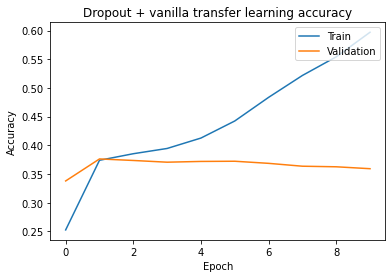

In [ ]:
plt.plot(vanilla_dropout_tl_history.history['accuracy'])
plt.plot(vanilla_dropout_tl_history.history['val_accuracy'])
plt.title('Dropout + vanilla transfer learning accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

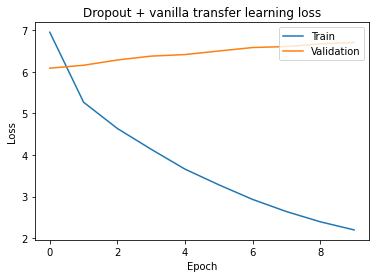

In [ ]:
plt.plot(vanilla_dropout_tl_history.history['loss'])
plt.plot(vanilla_dropout_tl_history.history['val_loss'])
plt.title('Dropout + vanilla transfer learning loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## 5) Datagen transfer learning + dropout

In [ ]:
from tensorflow.keras.applications import ResNet50V2

In [ ]:
pretrained_model = ResNet50V2(include_top=False, input_shape=[100, 100, 3], pooling='avg')  # we previously reshaped images to 100 x 100 squares

for layer in pretrained_model.layers:
  layer.trainable = False

In [ ]:
def get_transfer_learning_model(pretrained_model):
  model = Sequential()
  model.add(pretrained_model)
  model.add(BatchNormalization())
  # fully connected
  model.add(Flatten())
  model.add(Dense(256, activation = 'relu'))
  model.add(Dropout(rate=0.3))
  model.add(BatchNormalization())
  model.add(Dropout(rate=0.3))
  model.add(Dense(y_train_class_count, activation = 'softmax'))
  return model

datagen_transfer_learning_model = get_transfer_learning_model(pretrained_model)

In [ ]:
datagen_transfer_learning_model.compile(optimizer = get_optimizer(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
datagen_dropout_tl_history = datagen_transfer_learning_model.fit_generator(train_generator, 
                                                                   epochs=10, verbose = 2, 
                                                                   steps_per_epoch=STEP_SIZE_TRAIN, 
                                                                   validation_steps=STEP_SIZE_VALID, 
                                                                   callbacks=[get_lr_reduction_callback('val_loss')], 
                                                                   validation_data=validation_generator)

Epoch 1/10
109/109 - 127s - loss: 7.4685 - accuracy: 0.1969 - val_loss: 6.3397 - val_accuracy: 0.3886 - lr: 0.0010 - 127s/epoch - 1s/step
Epoch 2/10

Epoch 2: ReduceLROnPlateau reducing learning rate to 0.000800000037997961.
109/109 - 113s - loss: 6.0460 - accuracy: 0.3279 - val_loss: 6.4191 - val_accuracy: 0.3899 - lr: 0.0010 - 113s/epoch - 1s/step
Epoch 3/10
109/109 - 112s - loss: 5.3685 - accuracy: 0.3692 - val_loss: 6.1284 - val_accuracy: 0.3838 - lr: 8.0000e-04 - 112s/epoch - 1s/step
Epoch 4/10

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0006400000303983689.
109/109 - 113s - loss: 5.1621 - accuracy: 0.3731 - val_loss: 6.2109 - val_accuracy: 0.3872 - lr: 8.0000e-04 - 113s/epoch - 1s/step
Epoch 5/10

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005120000336319208.
109/109 - 113s - loss: 4.9866 - accuracy: 0.3723 - val_loss: 6.3153 - val_accuracy: 0.3852 - lr: 6.4000e-04 - 113s/epoch - 1s/step
Epoch 6/10

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0

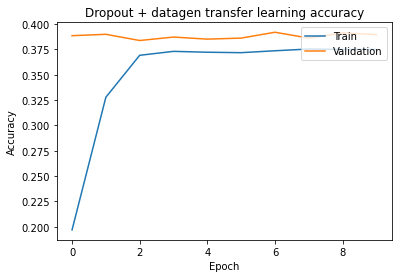

In [ ]:
plt.plot(datagen_dropout_tl_history.history['accuracy'])
plt.plot(datagen_dropout_tl_history.history['val_accuracy'])
plt.title('Dropout + datagen transfer learning accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

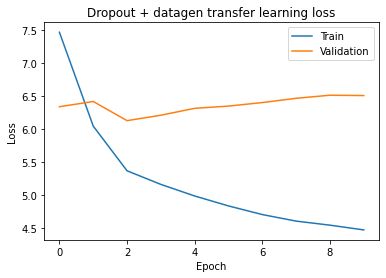

In [ ]:
plt.plot(datagen_dropout_tl_history.history['loss'])
plt.plot(datagen_dropout_tl_history.history['val_loss'])
plt.title('Dropout + datagen transfer learning loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## 6) Vanilla transfer learning + dropout + Early stopping

In [ ]:
from tensorflow.keras.applications import ResNet50V2

In [ ]:
pretrained_model = ResNet50V2(include_top=False, input_shape=[100, 100, 3], pooling='avg')  # we previously reshaped images to 100 x 100 squares

for layer in pretrained_model.layers:
  layer.trainable = False

94683136/94668760 [==============================] - 1s 0us/step


In [ ]:
def get_transfer_learning_model(pretrained_model):
  model = Sequential()
  model.add(pretrained_model)
  model.add(BatchNormalization())
  # fully connected
  model.add(Flatten())
  model.add(Dense(256, activation = 'relu'))
  model.add(Dropout(rate=0.3))
  model.add(BatchNormalization())
  model.add(Dropout(rate=0.3))
  model.add(Dense(y_train_class_count, activation = 'softmax'))
  return model

earlystopping_dropout_transfer_learning_model = get_transfer_learning_model(pretrained_model)

In [ ]:
earlystopping_dropout_transfer_learning_model.compile(optimizer = get_optimizer(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set a training handler
def get_early_stopping_callback(monitored_loss):
  """
  monitored_loss can either be loss or val_loss.
  """
  return EarlyStopping(monitor=monitored_loss, 
                           min_delta=0.5,  # if absolute change < min_delta, callback interprets it as no improvement
                           patience=1,
                           verbose=1,
                           mode='min',  # training will stop when the monitored loss has stopped decreasing
                           baseline=None)

In [ ]:
earlystopping_dropout_tl_callbacks = [get_lr_reduction_callback('val_loss'), get_early_stopping_callback('val_loss')]
earlystopping_dropout_tl_history = earlystopping_dropout_transfer_learning_model.fit(X_train, y_train, epochs=10, validation_split=0.3,callbacks=earlystopping_dropout_tl_callbacks)

Epoch 1/10
219/219 [==============================] - 461s 2s/step - loss: 6.9725 - accuracy: 0.2490 - val_loss: 6.0495 - val_accuracy: 0.3433 - lr: 0.0010
Epoch 2/10
219/219 [==============================] - ETA: 0s - loss: 5.2946 - accuracy: 0.3734
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.000800000037997961.
219/219 [==============================] - 415s 2s/step - loss: 5.2946 - accuracy: 0.3734 - val_loss: 6.1305 - val_accuracy: 0.3710 - lr: 0.0010
Epoch 2: early stopping


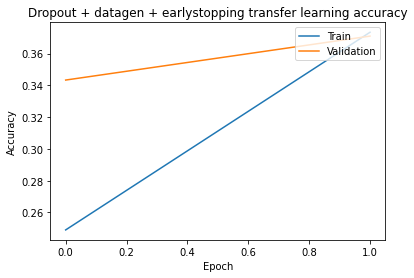

In [ ]:
plt.plot(earlystopping_dropout_tl_history.history['accuracy'])
plt.plot(earlystopping_dropout_tl_history.history['val_accuracy'])
plt.title('Dropout + datagen + earlystopping transfer learning accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

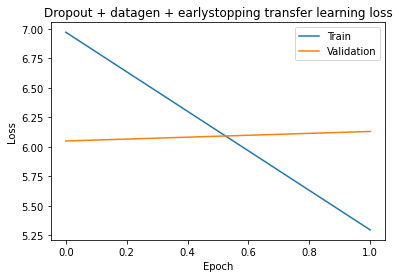

In [ ]:
plt.plot(earlystopping_dropout_tl_history.history['loss'])
plt.plot(earlystopping_dropout_tl_history.history['val_loss'])
plt.title('Dropout + datagen + earlystopping transfer learning loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## 7) Perform GridSearch hyperparameter tuning

In [36]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.losses import SparseCategoricalCrossentropy as cce
from sklearn.metrics import make_scorer
from scikeras.wrappers import KerasClassifier

import types

In [37]:
from tensorflow.keras.applications import ResNet50V2

In [38]:
pretrained_model = ResNet50V2(include_top=False, input_shape=[100, 100, 3], pooling='avg')  # we previously reshaped images to 100 x 100 squares

for layer in pretrained_model.layers:
  layer.trainable = False

94683136/94668760 [==============================] - 2s 0us/step


In [39]:
def get_transfer_learning_model(pretrained_model):
  model = Sequential()
  model.add(pretrained_model)
  model.add(BatchNormalization())
  # fully connected
  model.add(Flatten())
  model.add(Dense(256, activation = 'relu'))
  model.add(Dropout(rate=0.3))
  model.add(BatchNormalization())
  model.add(Dropout(rate=0.3))
  model.add(Dense(y_train_class_count, activation = 'softmax'))
  return model

dropout_transfer_learning_model = get_transfer_learning_model(pretrained_model)

In [40]:
dropout_transfer_learning_model.compile(optimizer = get_optimizer(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
cv_model = KerasClassifier(
    dropout_transfer_learning_model,
    loss='sparse_categorical_crossentropy',
    optimizer=get_optimizer(),
    epochs=10,
    validation_split=0.3,
    callbacks=[get_lr_reduction_callback('val_loss')],
    metrics=['accuracy']
)

In [42]:
# 2-Fold cross-validation

param_grid = dict(loss=['sparse_categorical_crossentropy'], optimizer=['adam', 'sgd', 'adamax', 'nadam'], )
grid = GridSearchCV(estimator=cv_model, param_grid=param_grid, cv=2)
grid_result = grid.fit(X_train, y_train)

INFO:tensorflow:Assets written to: ram:///tmp/tmpspu2qolg/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmpz9u5f7m8/assets
Epoch 1/10
110/110 [==============================] - 20s 66ms/step - loss: 7.4840 - accuracy: 0.3669 - val_loss: 7.2488 - val_accuracy: 0.4973 - lr: 0.0010
Epoch 2/10
110/110 [==============================] - 5s 45ms/step - loss: 5.9322 - accuracy: 0.6817 - val_loss: 6.0126 - val_accuracy: 0.8913 - lr: 0.0010
Epoch 3/10
109/110 [============================>.] - ETA: 0s - loss: 4.7714 - accuracy: 0.8532
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.000800000037997961.
110/110 [==============================] - 5s 45ms/step - loss: 4.7684 - accuracy: 0.8537 - val_loss: 6.2762 - val_accuracy: 0.9480 - lr: 0.0010
Epoch 4/10
109/110 [============================>.] - ETA: 0s - loss: 4.0918 - accuracy: 0.8673
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0006400000303983689.
110/110 [==============================] - 5s 45ms/step - loss: 4.089

In [43]:
grid_result.best_estimator_

KerasClassifier(
	model=<keras.engine.sequential.Sequential object at 0x7fef58ba4f10>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=sgd
	loss=sparse_categorical_crossentropy
	metrics=['accuracy']
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.callbacks.ReduceLROnPlateau object at 0x7fed827ca2d0>]
	validation_split=0.3
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

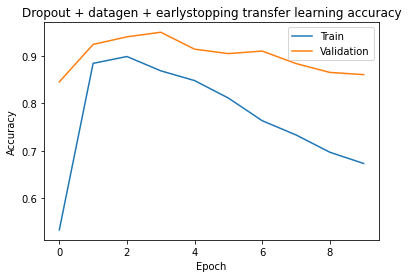

In [48]:
plt.plot(grid_result.best_estimator_.history_['accuracy'])
plt.plot(grid_result.best_estimator_.history_['val_accuracy'])
plt.title('Dropout + datagen + earlystopping transfer learning accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

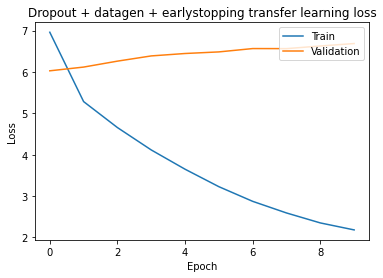

In [49]:
plt.plot(grid_result.best_estimator_.history_['loss'])
plt.plot(grid_result.best_estimator_.history_['val_loss'])
plt.title('Dropout + datagen + earlystopping transfer learning loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()